In [1]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from contextual_bandit import LinThompsonSampling, LogisticThompsonSampling, ContextualWebServer

In [2]:
# 実験設定
## アクション数
n_action=10

## ラウンド回数
T=1000

## シミュレーション回数
n_sim=30

## アクション特徴量の次元
dim_action_context=3

## 時刻tに依存したユーザー特徴量の次元
dim_user_context=3

## 文脈の次元
dim_context = (dim_action_context * dim_user_context) + dim_action_context + dim_user_context

## 真の報酬モデルの誤差項の分散
noise_ver=1.

## 乱数値
seed=12345

## UCBスコアにモデルの分散を考慮する度合いパラメータ
alpha=3.

## デザイン行列の初期化に依存したパラメータの(LinUCB), ガウス事前分布の分散(LinTS)
noise_zero_ver=1.

## 報酬のタイプ
reward_type="binary"

## ニュートン法の反復回数
n_epoch=5

## 時刻ごとにサイトに訪れたユーザーリクエストに応じて、アクションをレスポンスして報酬を受け取るwebサーバー
web_server = ContextualWebServer(
    n_action=n_action,
    dim_action_context=dim_action_context,
    dim_user_context=dim_user_context,
    dim_context=dim_context,
    reward_type=reward_type,
    noise_ver=noise_ver,
    seed=seed
)

In [3]:
results = defaultdict(lambda: defaultdict(list))

for _ in range(n_sim):
    
    # LinTS
    model = LinThompsonSampling(
        T=T,
        n_action=n_action,
        dim_action_context=dim_action_context,
        dim_context=dim_context,
        noise_ver=noise_ver,
        seed=seed,
        noise_zero_ver=noise_zero_ver,
    )
    metrics = model.run(web_server)
    
    model_name = "LinTS"
    for metric_name, metric_values in metrics.items():
        results[model_name][metric_name].append(metric_values)
    
    # LogisticTS
    model = LogisticThompsonSampling(
        T=T,
        n_action=n_action,
        dim_action_context=dim_action_context,
        dim_context=dim_context,
        noise_ver=noise_ver,
        seed=seed,
        noise_zero_ver=noise_zero_ver,
        n_epoch=n_epoch

    )
    metrics = model.run(web_server)
    
    model_name = "LogisticTS"
    for metric_name, metric_values in metrics.items():
        results[model_name][metric_name].append(metric_values)


mean_results = defaultdict(dict)
for policy_name, metrics in results.items():
    for metric_name, metric_values in metrics.items():
        mean_results[metric_name][policy_name] = np.array(metric_values).mean(0)

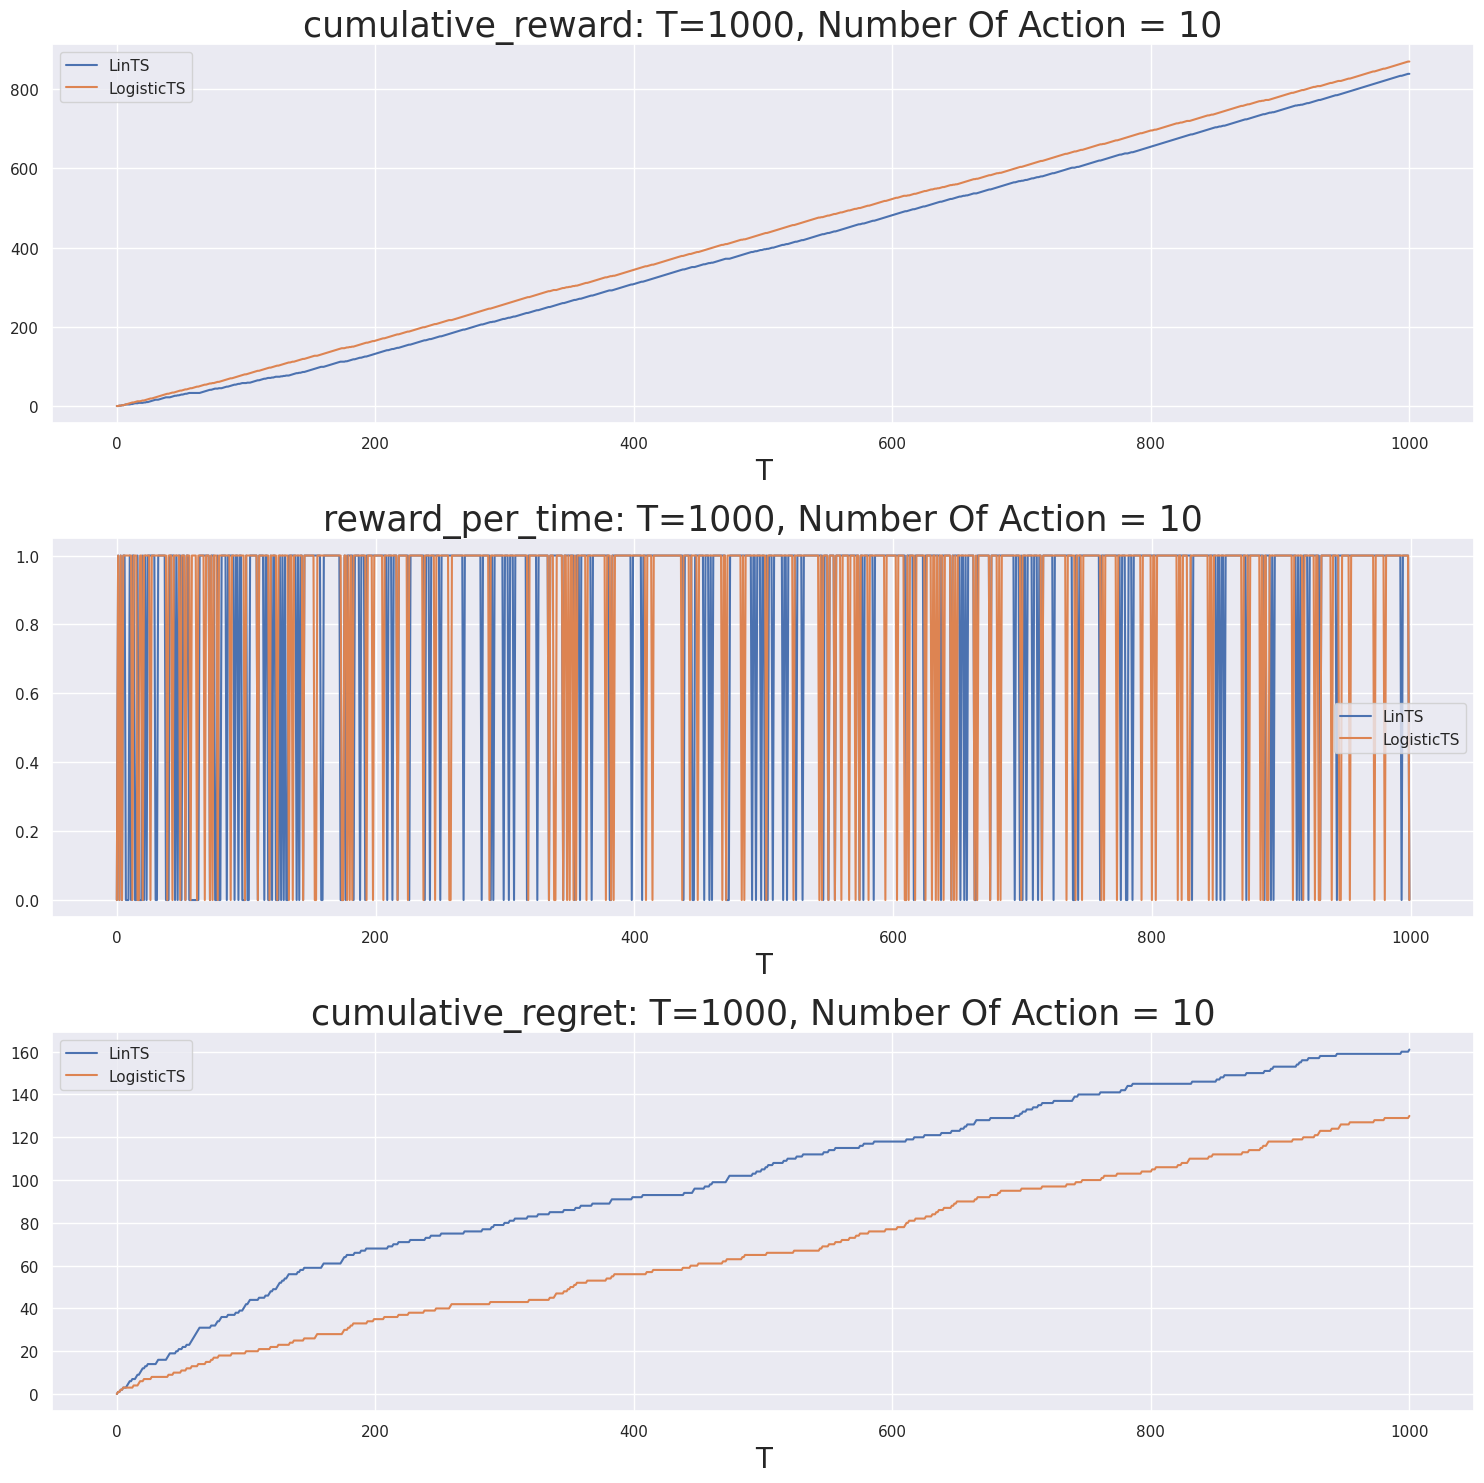

In [5]:
# plot
plt.figure(figsize=(15,15))

for index, metric_name in enumerate(mean_results):
    plt.subplot(3, 1, index + 1)
    plt.title(f'{metric_name}: T={T}, Number Of Action = {n_action}', fontsize=25)
    
    for policy_name, metric_values in mean_results[metric_name].items():
        plt.plot(metric_values, label=policy_name)
        
    plt.xlabel('T', fontsize=20)
    plt.legend()
    plt.tight_layout()

        
plt.show()